# Coding a simple neural network from scratch

Here we will learn backpropagation through a toy example just using the NumPy library (linear algebra library).
We will implement a 2 layer neural network. One layer for the input, one layer for the output. 

To do: 
- Import the numpy library as np. 

In [1]:
# import libraries 
import numpy as np

Neural networks are trained to predict an output from an input, so it is basically a function. 

In this case we will train a NN that received three binary numbers and output 1 binary number, and we will train it using the following data: 

                                 Input	     Output
                                0, 0, 0	       0
                                1, 1, 1	       1
                                1, 0, 1	       1
                                0, 1, 1	       0

We will predict the second column given the three input columns by coding the backpropagation in its simplest form. Run the next box to check how our network looks like.

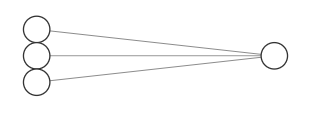

In [2]:
# draw the network
from IPython.display import Image
Image("../img/nn_2_draw.png", width = 300)

Impressive right? Let's go back to work.

To do: 
- Initialize the input dataset as a numpy matrix. Each row is a single "training example". Each column corresponds to one of our input nodes. Thus, we will have 3 input nodes to the network and 4 training examples.
- Initialize the output dataset. In this case, generate the dataset horizontally (with a single row and 4 columns) and add a ".T" to consider its transpose. After the transpose, this y matrix has 4 rows with one column. Just like our input, each row is a training example, and each column (only one) is an output node. So, our network has 3 inputs and 1 output.

In [3]:
# Input dataset matrix where each row is a training example
X = np.array([[0,0,0],
              [1,1,1],
              [1,0,1],
              [0,1,0]])

# Output dataset matrix where each row is a training example          
y = np.array([[0,1,1,0]]).T

We will be using the Sigmoid function and its derivative several times, so let's defined it as a function. 
A sigmoid function maps any value to a value between 0 and 1. This is what gives us a probability as output. It also has several other desirable properties for training neural networks. 
A desirable and useful property of a sigmoid function is that its output can be used to create its derivative. The derivative of the sigmoid's function output 'z' is simply 'z*(1-z)' (for details on this derivative, open sig_der.ng in img folder)

To do:
- Code the 'sigmoid' function with the sigmoid function.
- Code the 'dsigmoid' function with the derivative of the sigmoid function.
- Test your functions in the testing section (you need to get the 'correct' output for both functions). 

In [4]:
# sigmoid function and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))
# derivative of sigmoid function
def dsigmoid (x):
    return sigmoid(x)*(1-sigmoid(x))

# testing
if [sigmoid(0),np.round(sigmoid(1),1),np.round(sigmoid(-1),1)] == [0.5, 0.7, 0.3]:
    print('sigmoid correct')
if [dsigmoid(0),np.round(dsigmoid(1),1),np.round(sigmoid(-1),1)] == [0.25, 0.2, 0.3]:
    print('dsigmoid correct')

sigmoid correct
dsigmoid correct


We will seed the random numbers to be created. Your numbers will still be randomly distributed, but they'll be randomly distributed in exactly the same way each time you train. This is a good practice as it makes it easier to see how your changes affect the network.

In [5]:
# seed random numbers to make calculation
np.random.seed(1)

Next, we need to set the weight matrix for this neural network. We will call it "w0" to imply "weights zero". Since we only have 2 layers (input and output), we only need one matrix of weights to connect them. Because we have 3 inputs and 1 output, its dimension should be (3,1) (Also, l0 is of size 3 and l1 is of size 1, that's another useful way to think about it). Thus, we want to connect every node in l0 to every node in l1, which requires a matrix of dimensionality (3,1). 

Also, we will need to initialize it randomly with a mean of zero. There's no agreement on how to initialize weights, but a mean of zero in weight initialization is an acceptable one.

One thing to notice here is that the "neural network" is really this matrix, as it contains the values from where we will calculate the output from the inputs. All the learnings will be updated here. 

To do:
- Construct the weigth matrix with cero mean (use np.random.random() https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html)

In [6]:
# First layer of weights, 'w0', connecting layer 0, 'l0', to layer 1, 'l1' (initialize weights randomly with mean 0)
w0 = 2*np.random.random((3,1)) - 1

# for the sake of this tutorial, we will set these weights to constant values for now:
w0 = np.array([[0.06633057],[0.38375423],[-0.36896874]])

Now we need to begin the network training. We will define a 'loop' that iterates multiple times over the training to optimize the weights of our network. 

But first, just to develop some intuition, we will calculate the first step of the loop outside. 
Let's begin by calculating the first layer, which is simply our data. Remember that our input dataset matrix contains 4 training examples (rows). We will be implementing a 'full batch' training, where we're going to process all of them at the same time (we have 4 different l0 rows, but you can think of it as a single training example).

To do:
- Define the first layer, l0. 

In [7]:
# First layer
l0 = X

The second layer is the predictions of our neural network. First, we let the network predict the output given the input with the current weights. Then, we will check how it matches the true output and adjusts it a bit better in every iteration. 
When defining the second layer, remember that matrix multiplication is ordered, such the dimensions in the middle of the equation must be the same. The final matrix generated is thus the number of rows of the first matrix and the number of columns of the second matrix. 

Our input matrix contains 4 training examples, and the neural network should output 4 numbers, that means a (4 x 1) matrix. Each output is a network's guess for a given input.

To do: 
- Calculate the second layer, l1, by forward propagation. Uncomment the print commands to check the shape of the variables involved.

In [8]:
# check shapes 
#print(l0.shape)
#print(w0.shape)

# Forward propagation
l1 = sigmoid(np.dot(l0,w0))

# check shape 
#print(l1.shape)

# testing
if (np.round(l1[0],1) == 0.5):
    print('l1 correct')

l1 correct


Now lets calculate the error given tha l1 has our initial guest for the each input. The error is just a vector of positive and negative numbers reflecting how much the network missed. 

In [9]:
# error calculation
l1_error = y - l1

The next step is where things get interesting. Now we need to calculate the 'error weighted derivative' that we are going to use later to update the weights.

To do:
- Calculate the derivative of the Sigmoid function evaluated in layer 1. Multiply it by the error in layer 1 (elementwise,*) to get the error weighted derivative 'l1_delta'. Note that l1_error is a (4,1) matrix. sigmoid(l1,True) returns a (4,1) matrix, so an element-wise multiplication should return a (4,1) matrix.

In [10]:
# delta calculation: multiply how much we missed by the slope of the sigmoid at the values in l1
l1_delta = l1_error * dsigmoid(l1)

# check shape 
#print(l1_delta.shape)

# testing
if (np.round(l1_delta[0],1) == -0.1):
    print('l1_delta correct')

l1_delta correct


There is a lot going on in the last line. Let's divided it into two parts. 

First: the derivative. Run the next command to plot a sigmoid function. 
Let's consider that l1 values are the color dots show long the sigmoid, and the lines are their respective derivatives (slopes). The key aspect to notice here is that when x is close to 0 the slope is high (blue dot) and when x gets bigger the slope gets much smaller (green dot). 

Second: multiplying the derivative by the error in layer 1. By multiplying the slope by the error we are reducing the error of high confidence predictions. For example, if the slope is flat (like in the green dot), it means that the guessed by the network is very high, like x=2, y=0.9 (or very low). This means that the network was quite confident one way or the other. On the other hand, if the network guessed something close to x=0, y=0.5, then it isn't very confident. So, by multiplying the error by the derivative, we relatively amplify the error of not confident estimations compare to the high confident ones. 


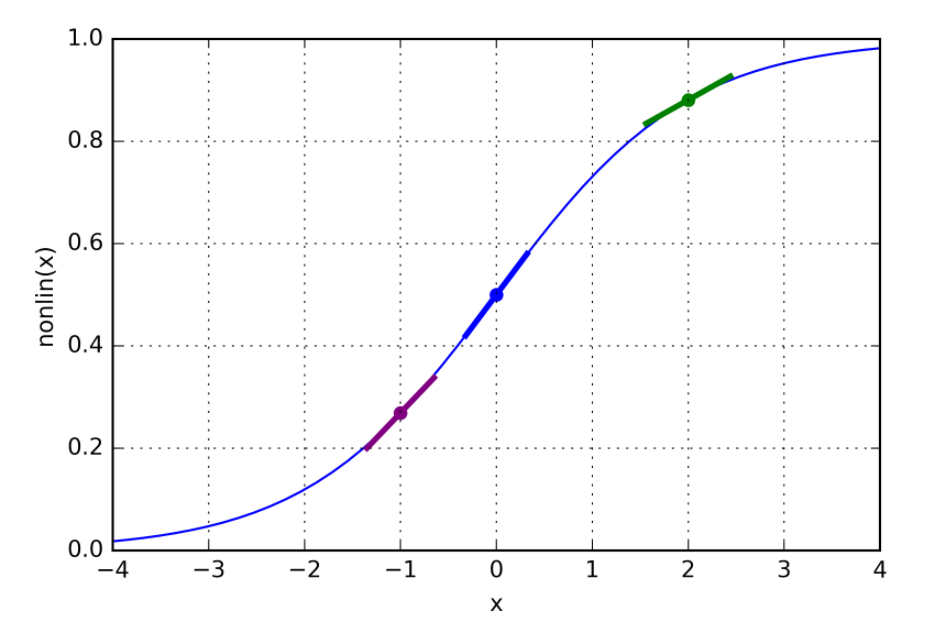

In [11]:
from IPython.display import Image
Image("../img/sigmoid.png", width = 500)

Now we are ready to update the weights!

To do: 
- Calculate the '_add' term (this is an auxiliar variable that then we will be adding to the weigth to update it) by the dot product between layer 0 and the error weighted derivative. Remember that the dot product of two vectors is between vectors that share columns (first vector) and rows (second vector).  
- Update weights by adding to the current value the dot product between layer 0 and the error weighted derivative ('_add') term.

In [12]:
# calculate term to be added to current weigths
_add = np.dot(l0.T,l1_delta)

# check shape 
#print(_add.shape)
# check values. Which weight is being incremented more?

# testing
if (np.round(_add[0],1) == 0.2):
    print('_add term correct')

_add term correct


In [13]:
# update weights
w0 = w0 + _add
# note: every time that you execute this comand it will update w0 (run it just once).

If you got it all correct well done! Now you are ready to code the loop to train your neural network. We will define a 'for' loop that 'iterates' 10.000 times over the training code to optimize our network (weights) to the dataset.

To do:
- Using the code developed in previous sections, complete the for loop and test it. Remember that in python for loops, indentation matters.

In [14]:
# First layer of weights, w0, connecting layer 0, l0, to layer 1, l1 (initialize weights randomly with mean 0)
w0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0,w0))

    # error calculation
    l1_error = y - l1

    # delta calculation
    l1_delta = l1_error * dsigmoid(l1)

    # update weights
    w0 += np.dot(l0.T,l1_delta)
    
    if (False and (iter% 1000) == 0):
        print("layer 1 values at iteration "+str(iter)+" :"+str(np.mean(np.abs(l1))))
    if (False and (iter% 1000) == 0):
        print("Error at layer 1 at iteration "+str(iter)+" :"+str(np.mean(np.abs(l1_error))))

# check results
for i, yt in enumerate(y):
    if yt != int(np.round(l1[i])):
        print('Test not passed')
        print('Layer 1 after last iteration:')
        print(np.round(l1))
        break
    else:
        if i == len(y)-1:
            print('Test passed!')
            print('Layer 1 after last iteration:')
            print(np.round(l1))
        pass

Test passed!
Layer 1 after last iteration:
[[0.]
 [1.]
 [1.]
 [0.]]


If you got the test passed means that your NN works! But what does it mean that it works? Well, basically that we have calibrated the weights based on the data, and now any input with the same structure of the input dataset could be run throw the network and generate an output. The whole idea is that the calibrated weights captured some patterns of the transformation by just seeing the inputs and the outputs. 

Why is this useful? For example, if we had a very complicated, time-consuming mathematical function to transforms inputs into outputs, we could use our calibrated neural network to give a really quick output. This is what is called a surrogate model. Could you think in any context that this could be applied?  

Take some time to play around with the code to get more intuition on how it works. For example, you could:
- Check how 'l1' changes every 1000 iteration (set to True the first 'if' statement on the loop).  
- Check out how 'l1_error' changes as you iterate (set to True the second 'if' statement on the loop).  
- Take a close look at the line where 'l1_delta' is defined. Here is where the magic happens.
- Check out the line where we defined 'w0'. Everything in the network prepares for this operation.

# Acknowledgement

This toy example has been adapted from the following blog:

https://iamtrask.github.io/2015/07/12/basic-python-network/

Many thanks to the author!